In [9]:
import pandas as pd
                       
features = pd.read_excel(r'E:\\hackstat final round\\Variables Finalized - Insurance.xlsx')
trainset = pd.read_excel(r'E:\\hackstat final round\\insurance_syn_hackathon_phase1.xlsx')

In [303]:
print(features.shape)
features

(21, 2)


,Feature,Feature Description
0,ID,Record Identifier
1,TENURE_QUINTILES,Quintiles of policy tenure (snapshot date - co...
2,payment_pr1q_mean_diff_days,Average number of days between due and paid da...
3,payment_pr1q_num_payments,Number of payments in the past three months fr...
4,FUND_VALUE2,Fund value
5,Mode_Month,Payment frequency is monthly (0/1)
6,payment_pr1q_med_diff_days,Median of number of days between due and paid ...
7,payment_pr1q_sd_diff_days,Standard deviation of number of days between d...
8,payment_pr1q_num_past_due,Number of past-due payments in the past three ...
9,payment_pr1q_num_past_due_30d,Number of >30 days past-due payments in the pa...


In [304]:
print(trainset.shape)
trainset

(60007, 21)


,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,...,COMMENCEMENT_MONTH,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,Mode_Quarter,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,...,5,-1540.834997,14847.77534,0,59.703765,6.927565,0.0,13.533617,0,0
1,2,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,NaN,...,3,3050.669914,18127.10254,0,49.183609,-2.769722,0.0,13.750541,0,0
2,3,2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1.0,...,1,11687.537130,103898.55730,0,46.821003,8.148305,0.0,21.999173,0,0
3,4,0,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0.0,...,3,11349.370640,-64724.09148,0,29.872764,12.255236,0.0,24.802638,0,0
4,5,0,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1.0,...,9,8186.397688,-49111.52822,0,36.998385,4.362300,NaN,15.552943,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,1,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,1.0,...,2,-4566.366068,180299.31340,0,29.838690,1.810030,0.0,21.835799,0,0
60003,60004,3,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,1.0,...,6,8937.487299,168677.03520,0,48.442519,2.280073,0.0,18.919716,0,0
60004,60005,0,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0.0,...,4,-9342.509054,72870.85922,0,61.568204,1.364022,0.0,34.112120,0,0
60005,60006,1,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0.0,...,9,2241.004176,46153.08708,0,39.878620,7.729683,0.0,20.903099,0,0


In [10]:
trainset.isnull().sum()

ID                                  0
TENURE_QUINTILES                    0
payment_pr1q_mean_diff_days         0
payment_pr1q_num_payments           0
FUND_VALUE2                         0
Mode_Month                          0
payment_pr1q_med_diff_days          0
payment_pr1q_sd_diff_days           0
payment_pr1q_num_past_due           0
payment_pr1q_num_past_due_30d    8190
Mode_Annual                         0
COMMENCEMENT_MONTH                  0
payment_pr1q_sd_pay_amt             0
ABC_ANNUAL_PREMIUM2                 0
Mode_Quarter                        0
age                                 0
payment_pr1q_sd_pay_date            0
NO_OF_CHILDREN2                  8105
TERM                                0
Mode_Half                           0
lapse_var                           0
dtype: int64

In [5]:
payment_pr1q_mean_diff_days = trainset['payment_pr1q_mean_diff_days']

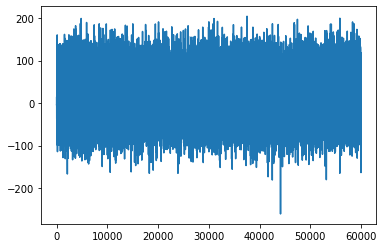

In [6]:
import matplotlib.pyplot as plt
plt.plot(payment_pr1q_mean_diff_days)

In [16]:
import numpy as np
import seaborn as sns
X = trainset.iloc[:,0:21]    #target column i.e price range
#get correlations of each features in dataset
corr = trainset.corr()

corr.style.background_gradient(cmap='coolwarm')


# plt.figure(figsize=(20,20))
# #plot heat map
# ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(50, 400, n=200),square=True)

,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,Mode_Annual,COMMENCEMENT_MONTH,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,Mode_Quarter,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var
ID,1,0.00258863,0.00210237,-0.00449744,0.00111094,-0.00537626,0.00516204,-0.000688016,-0.00306116,0.000362142,0.00795715,-0.00155678,0.000961656,-0.0034541,-0.00616361,-0.000885493,0.00204184,-0.000917607,0.00779548,-0.00418195,-0.0281486
TENURE_QUINTILES,0.00258863,1,-0.000629148,-0.00814163,-0.00533859,0.000824821,-0.00428884,0.00448939,0.00160323,-0.00444246,-0.00271129,-0.0105542,0.00165174,0.00933148,-0.00298914,-0.00376286,-0.00373586,0.00123802,0.000151777,-0.00494042,-0.00337528
payment_pr1q_mean_diff_days,0.00210237,-0.000629148,1,0.0033902,0.00649402,0.00205502,0.00227415,0.00625167,0.000201093,0.00109816,0.00297262,-0.0021808,-0.00162503,0.00170699,0.000672397,-0.00354663,-0.00255025,0.00283479,0.00598003,0.00376668,-0.00226134
payment_pr1q_num_payments,-0.00449744,-0.00814163,0.0033902,1,-0.00173465,0.000407723,-0.00415871,-0.00214515,-0.00271773,-0.00156787,0.00238922,-0.00360391,-0.00161431,0.00187823,-0.00127013,3.74418e-05,0.000987583,0.00860249,-0.00226894,0.00502655,0.00627803
FUND_VALUE2,0.00111094,-0.00533859,0.00649402,-0.00173465,1,-0.00065255,0.000888966,0.00711736,-0.00331654,0.000405984,0.00641992,0.00563125,0.0058565,0.00762359,0.00902825,0.00180598,0.000114402,0.00423246,0.00124307,0.00301215,0.00115873
Mode_Month,-0.00537626,0.000824821,0.00205502,0.000407723,-0.00065255,1,-0.00322096,-0.00524204,-0.00167771,-0.00890196,-0.0126721,-0.00474312,0.00182229,-0.00478172,0.00769892,0.00329535,0.00309943,0.00115103,-0.00211298,-0.000195928,-0.00571192
payment_pr1q_med_diff_days,0.00516204,-0.00428884,0.00227415,-0.00415871,0.000888966,-0.00322096,1,0.00496544,-0.00172934,0.00402329,-0.00350782,-0.00751138,0.00323222,-0.000449037,-0.00368337,-0.00457409,-0.00263906,0.00483944,-0.00143645,0.00622607,0.00205377
payment_pr1q_sd_diff_days,-0.000688016,0.00448939,0.00625167,-0.00214515,0.00711736,-0.00524204,0.00496544,1,-0.00123768,-0.00199112,0.00384823,0.00675972,-0.00292505,-0.00376152,-0.00786097,0.00601536,-0.000109599,-0.00604507,0.00601483,-0.00104907,0.00165405
payment_pr1q_num_past_due,-0.00306116,0.00160323,0.000201093,-0.00271773,-0.00331654,-0.00167771,-0.00172934,-0.00123768,1,-0.00313177,0.00559544,0.000386663,0.000115035,0.00307617,-0.00565144,-0.00137718,0.000703967,0.00218863,-0.00301439,0.00525197,0.000872024
payment_pr1q_num_past_due_30d,0.000362142,-0.00444246,0.00109816,-0.00156787,0.000405984,-0.00890196,0.00402329,-0.00199112,-0.00313177,1,0.000972835,0.00302156,-0.010959,0.00621688,0.0034121,-0.00924561,-0.00446855,0.00368885,-0.00362724,-0.0034501,-0.00256593


In [8]:
trainset.isnull().sum()

ID                               0
TENURE_QUINTILES                 0
payment_pr1q_mean_diff_days      0
payment_pr1q_num_payments        0
FUND_VALUE2                      0
Mode_Month                       0
payment_pr1q_med_diff_days       0
payment_pr1q_sd_diff_days        0
payment_pr1q_num_past_due        0
payment_pr1q_num_past_due_30d    0
Mode_Annual                      0
COMMENCEMENT_MONTH               0
payment_pr1q_sd_pay_amt          0
ABC_ANNUAL_PREMIUM2              0
Mode_Quarter                     0
age                              0
payment_pr1q_sd_pay_date         0
NO_OF_CHILDREN2                  0
TERM                             0
Mode_Half                        0
lapse_var                        0
dtype: int64

In [11]:
trainset

,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,...,COMMENCEMENT_MONTH,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,Mode_Quarter,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,...,5,-1540.834997,14847.775340,0,59.703765,6.927565,0.0,13.533617,0,0
1,2,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,NaN,...,3,3050.669914,18127.102540,0,49.183609,-2.769722,0.0,13.750541,0,0
2,3,2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1.0,...,1,11687.537130,103898.557300,0,46.821003,8.148305,0.0,21.999173,0,0
3,4,0,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0.0,...,3,11349.370640,-64724.091480,0,29.872764,12.255236,0.0,24.802638,0,0
4,5,0,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1.0,...,9,8186.397688,-49111.528220,0,36.998385,4.362300,NaN,15.552943,0,0
5,6,2,-22.163258,2.688417,2.070000e+07,1,126.528610,42.478879,0.769801,1.0,...,9,6181.590677,22009.440520,0,43.411640,4.933647,1.0,16.979481,0,0
6,7,2,52.431916,-0.272151,7.567418e+06,0,51.859362,-64.109020,3.877532,1.0,...,9,-5270.475590,27565.708810,0,29.869986,6.011440,2.0,12.062683,0,0
7,8,1,-17.336019,0.025436,2.580000e+07,1,52.567276,77.082352,0.455193,1.0,...,5,7927.931607,29301.067690,0,40.521141,6.613026,3.0,17.893648,0,0
8,9,0,-17.728233,1.101131,-6.636662e+06,1,15.480426,-15.653784,3.004976,0.0,...,3,-16805.245680,38856.436820,0,49.903423,1.334158,NaN,19.730852,0,0
9,10,1,-18.548074,0.407311,4.787733e+06,0,-3.593384,3.788942,0.994515,1.0,...,3,-5773.927379,56403.138150,0,20.046795,9.660788,0.0,10.541625,0,0


In [312]:
# Create the Scaler object
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler()
# # Fit your data on the scaler object
# scaled_df = scaler.fit_transform(trainset.iloc[:,1:20])
# scaled_df = pd.DataFrame(scaled_df, columns=trainset.columns[1:20] )

In [12]:
predictors = trainset
target = trainset['lapse_var']

In [13]:
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import metrics

In [14]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((48005, 21), (12002, 21), (48005,), (12002,))

In [15]:
from sklearn.metrics import classification_report
clf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
report = classification_report(y_test, preds)
matrix = confusion_matrix(y_test, preds)
print(matrix)
print(report)
count = 0
for i in range(12002):
    if preds[i] == 1:
        count += 1
print(count)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [317]:
trainset

,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,...,COMMENCEMENT_MONTH,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,Mode_Quarter,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,...,5,-1540.834997,14847.77534,0,59.703765,6.927565,0.0,13.533617,0,0
1,2,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,1.0,...,3,3050.669914,18127.10254,0,49.183609,-2.769722,0.0,13.750541,0,0
2,3,2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1.0,...,1,11687.537130,103898.55730,0,46.821003,8.148305,0.0,21.999173,0,0
3,4,0,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0.0,...,3,11349.370640,-64724.09148,0,29.872764,12.255236,0.0,24.802638,0,0
4,5,0,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1.0,...,9,8186.397688,-49111.52822,0,36.998385,4.362300,0.0,15.552943,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,1,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,1.0,...,2,-4566.366068,180299.31340,0,29.838690,1.810030,0.0,21.835799,0,0
60003,60004,3,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,1.0,...,6,8937.487299,168677.03520,0,48.442519,2.280073,0.0,18.919716,0,0
60004,60005,0,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0.0,...,4,-9342.509054,72870.85922,0,61.568204,1.364022,0.0,34.112120,0,0
60005,60006,1,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0.0,...,9,2241.004176,46153.08708,0,39.878620,7.729683,0.0,20.903099,0,0


In [318]:
modes = trainset.iloc[:,[5,10,14,19]]
# Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual
Mode_Month = trainset['Mode_Month']
Mode_Quarter = trainset['Mode_Quarter']
Mode_Half = trainset['Mode_Half']
Mode_Annual = trainset['Mode_Annual']
print(modes)

       Mode_Month  Mode_Annual  Mode_Quarter  Mode_Half
0               1            0             0          0
1               1            0             0          0
2               1            0             0          0
3               1            0             0          0
4               1            0             0          0
...           ...          ...           ...        ...
60002           1            0             0          0
60003           1            0             0          0
60004           1            0             0          0
60005           1            0             0          0
60006           1            0             0          0

[60007 rows x 4 columns]


In [319]:
count2 = 0
for i in range(60007):
    count = 0
    if Mode_Month[i] == 1:
        count += 1
    if Mode_Quarter[i] == 1:
        count += 1
    if Mode_Half[i] == 1:
        count += 1
    if Mode_Annual[i] == 1:
        count += 1
    if count > 1:
        count2 += 1
print(count2)        

10132


In [320]:
import pandas as pd

trainset1 = pd.read_excel(r'E:\\hackstat final round\\insurance_syn_hackathon_phase1.xlsx')
trainset1 = trainset1.dropna()
print(trainset1.shape)
trainset1.isnull().sum()

(44869, 21)


ID                               0
TENURE_QUINTILES                 0
payment_pr1q_mean_diff_days      0
payment_pr1q_num_payments        0
FUND_VALUE2                      0
Mode_Month                       0
payment_pr1q_med_diff_days       0
payment_pr1q_sd_diff_days        0
payment_pr1q_num_past_due        0
payment_pr1q_num_past_due_30d    0
Mode_Annual                      0
COMMENCEMENT_MONTH               0
payment_pr1q_sd_pay_amt          0
ABC_ANNUAL_PREMIUM2              0
Mode_Quarter                     0
age                              0
payment_pr1q_sd_pay_date         0
NO_OF_CHILDREN2                  0
TERM                             0
Mode_Half                        0
lapse_var                        0
dtype: int64

In [321]:
trainset1

,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,...,COMMENCEMENT_MONTH,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,Mode_Quarter,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,...,5,-1540.834997,14847.77534,0,59.703765,6.927565,0.0,13.533617,0,0
2,3,2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1.0,...,1,11687.537130,103898.55730,0,46.821003,8.148305,0.0,21.999173,0,0
3,4,0,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0.0,...,3,11349.370640,-64724.09148,0,29.872764,12.255236,0.0,24.802638,0,0
5,6,2,-22.163258,2.688417,2.070000e+07,1,126.528610,42.478879,0.769801,1.0,...,9,6181.590677,22009.44052,0,43.411640,4.933647,1.0,16.979481,0,0
6,7,2,52.431916,-0.272151,7.567418e+06,0,51.859362,-64.109020,3.877532,1.0,...,9,-5270.475590,27565.70881,0,29.869986,6.011440,2.0,12.062683,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,1,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,1.0,...,2,-4566.366068,180299.31340,0,29.838690,1.810030,0.0,21.835799,0,0
60003,60004,3,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,1.0,...,6,8937.487299,168677.03520,0,48.442519,2.280073,0.0,18.919716,0,0
60004,60005,0,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0.0,...,4,-9342.509054,72870.85922,0,61.568204,1.364022,0.0,34.112120,0,0
60005,60006,1,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0.0,...,9,2241.004176,46153.08708,0,39.878620,7.729683,0.0,20.903099,0,0


In [322]:
tenture_dummies = pd.get_dummies(trainset['TENURE_QUINTILES'])
# tenture_dummies.rename({'0':'TENURE_QUINTILES_0', '1':'TENURE_QUINTILES_1', '2':'TENURE_QUINTILES_2', '3':'TENURE_QUINTILES_3'}, axis='columns')
new_trainset = pd.concat([trainset,tenture_dummies],axis=1)
new_trainset

,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,...,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var,0,1,2,3
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,...,59.703765,6.927565,0.0,13.533617,0,0,0,1,0,0
1,2,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,1.0,...,49.183609,-2.769722,0.0,13.750541,0,0,0,0,1,0
2,3,2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1.0,...,46.821003,8.148305,0.0,21.999173,0,0,0,0,1,0
3,4,0,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0.0,...,29.872764,12.255236,0.0,24.802638,0,0,1,0,0,0
4,5,0,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1.0,...,36.998385,4.362300,0.0,15.552943,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,1,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,1.0,...,29.838690,1.810030,0.0,21.835799,0,0,0,1,0,0
60003,60004,3,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,1.0,...,48.442519,2.280073,0.0,18.919716,0,0,0,0,0,1
60004,60005,0,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0.0,...,61.568204,1.364022,0.0,34.112120,0,0,1,0,0,0
60005,60006,1,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0.0,...,39.878620,7.729683,0.0,20.903099,0,0,0,1,0,0


In [323]:
# tenture_dummies
# # p = tenture_dummies.rename(index=str,columns={'0':'TENURE_QUINTILES_0', '1':'TENURE_QUINTILES_1', '2':'TENURE_QUINTILES_2', '3':'TENURE_QUINTILES_3'})
# old_names = ['0', '1', '2', '3'] 
# new_names = ['TENURE_QUINTILES_0', 'TENURE_QUINTILES_1', 'TENURE_QUINTILES_2', 'TENURE_QUINTILES_3']
# # tenture_dummies.rename(index = {'0':'TENURE_QUINTILES_0', '1':'TENURE_QUINTILES_1', '2':'TENURE_QUINTILES_2', '3':'TENURE_QUINTILES_3'}, inplace = True) 

In [324]:
import numpy as np
import seaborn as sns

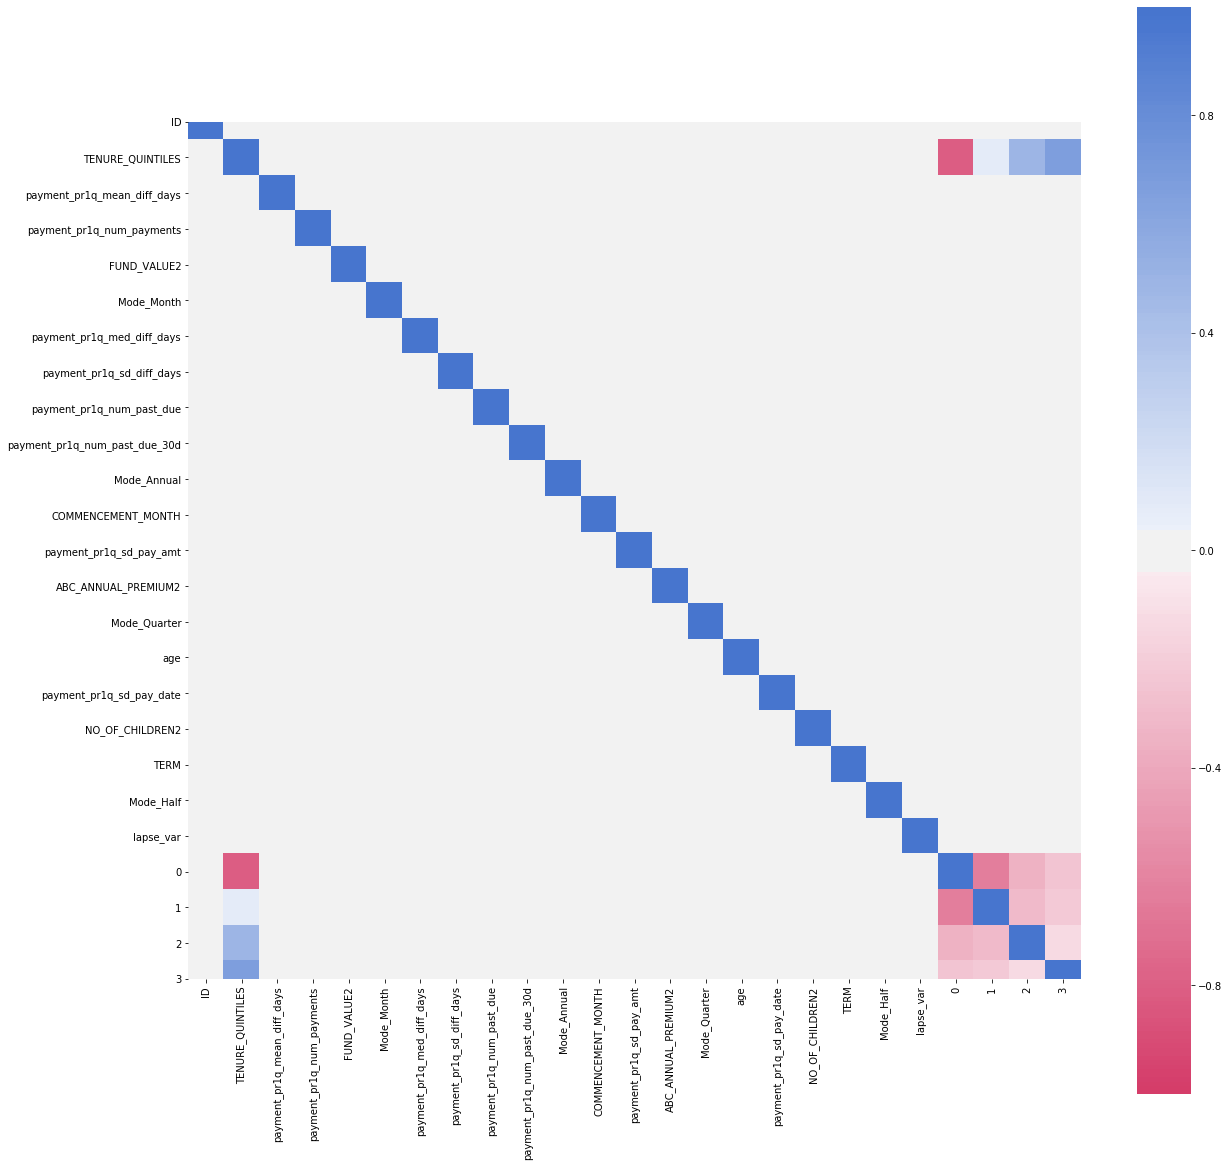

In [325]:
X = new_trainset.iloc[:,0:25]    #target column i.e price range
#get correlations of each features in dataset
corr = new_trainset.corr()
plt.figure(figsize=(20,20))
#plot heat map
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(0, 256, n=200),square=True)

In [326]:
mean_diff = trainset['payment_pr1q_mean_diff_days']
num_pay = trainset['payment_pr1q_num_payments']
fund = trainset['FUND_VALUE2']
med_diff = trainset['payment_pr1q_med_diff_days']
std_diff = trainset['payment_pr1q_sd_diff_days']
num_past_due = trainset['payment_pr1q_num_past_due']
sd_pay_amt = trainset['payment_pr1q_sd_pay_amt']
ann_pre = trainset['ABC_ANNUAL_PREMIUM2']
sd_pay_date = trainset['payment_pr1q_sd_pay_date']

count_mean_diff = 0
count_num_pay = 0
count_fund = 0
count_med_diff = 0
count_std_diff = 0
count_num_past_due = 0
count_sd_pay_amt = 0
count_ann_pre = 0
count_sd_pay_date = 0

for i in range(60007):
    if mean_diff[i] < 0:
        count_mean_diff += 1
    if num_pay[i] < 0:
        count_num_pay += 1
    if fund[i] < 0:
        count_fund += 1
    if med_diff[i] < 0:
        count_med_diff += 1
    if std_diff[i] < 0:
        count_std_diff += 1
    if num_past_due[i] < 0:
        count_num_past_due += 1
    if sd_pay_amt[i] < 0:
        count_sd_pay_amt += 1
    if ann_pre[i] < 0:
        count_ann_pre += 1
    if sd_pay_date[i] < 0:
        count_sd_pay_date += 1
    
print("count_mean_diff",count_mean_diff)
print("count_num_pay",count_num_pay)
print("count_fund",count_fund)
print("count_med_diff",count_med_diff)
print("count_std_diff",count_std_diff)
print("count_num_past_due",count_num_past_due)
print("count_sd_pay_amt",count_sd_pay_amt)
print("count_ann_pre",count_ann_pre)
print("count_sd_pay_date",count_sd_pay_date)

count_mean_diff 20296
count_num_pay 1821
count_fund 20692
count_med_diff 20216
count_std_diff 19002
count_num_past_due 2105
count_sd_pay_amt 25670
count_ann_pre 18665
count_sd_pay_date 10957


In [327]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")
fill = imp.fit_transform(trainset.iloc[:,[9,17]])
nan_fill = pd.DataFrame({'payment_pr1q_num_past_due_30d': fill[:, 0], 'NO_OF_CHILDREN2': fill[:, 1]})
print(nan_fill)
Y = trainset['lapse_var']
trainset = trainset.drop(['payment_pr1q_num_past_due_30d', 'NO_OF_CHILDREN2', 'lapse_var'], axis=1)
trainset

       payment_pr1q_num_past_due_30d  NO_OF_CHILDREN2
0                                1.0              0.0
1                                1.0              0.0
2                                1.0              0.0
3                                0.0              0.0
4                                1.0              0.0
...                              ...              ...
60002                            1.0              0.0
60003                            1.0              0.0
60004                            0.0              0.0
60005                            0.0              0.0
60006                            1.0              0.0

[60007 rows x 2 columns]


,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,Mode_Annual,COMMENCEMENT_MONTH,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,Mode_Quarter,age,payment_pr1q_sd_pay_date,TERM,Mode_Half
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,0,5,-1540.834997,14847.77534,0,59.703765,6.927565,13.533617,0
1,2,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,0,3,3050.669914,18127.10254,0,49.183609,-2.769722,13.750541,0
2,3,2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,0,1,11687.537130,103898.55730,0,46.821003,8.148305,21.999173,0
3,4,0,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0,3,11349.370640,-64724.09148,0,29.872764,12.255236,24.802638,0
4,5,0,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,0,9,8186.397688,-49111.52822,0,36.998385,4.362300,15.552943,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,1,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,0,2,-4566.366068,180299.31340,0,29.838690,1.810030,21.835799,0
60003,60004,3,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,0,6,8937.487299,168677.03520,0,48.442519,2.280073,18.919716,0
60004,60005,0,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0,4,-9342.509054,72870.85922,0,61.568204,1.364022,34.112120,0
60005,60006,1,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0,9,2241.004176,46153.08708,0,39.878620,7.729683,20.903099,0


In [328]:
tenture_dummies = tenture_dummies.rename(columns={0: "TENURE_QUINTILES_0", 1: "TENURE_QUINTILES_1", 2:"TENURE_QUINTILES_2", 3:"TENURE_QUINTILES_3"})
tenture_dummies

,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
60002,0,1,0,0
60003,0,0,0,1
60004,1,0,0,0
60005,0,1,0,0


In [329]:
COMMENCEMENT_MONTH_dummies = pd.get_dummies(trainset['COMMENCEMENT_MONTH'])
COMMENCEMENT_MONTH_dummies = COMMENCEMENT_MONTH_dummies.rename(columns={1: "Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"May", 6: "Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11: "Nov", 12:"Dec"})
COMMENCEMENT_MONTH_dummies

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60002,0,1,0,0,0,0,0,0,0,0,0,0
60003,0,0,0,0,0,1,0,0,0,0,0,0
60004,0,0,0,1,0,0,0,0,0,0,0,0
60005,0,0,0,0,0,0,0,0,1,0,0,0


In [337]:
new_trainset = pd.concat([trainset,tenture_dummies,COMMENCEMENT_MONTH_dummies,nan_fill,Y],axis=1)
new_trainset = new_trainset.drop(['TENURE_QUINTILES','COMMENCEMENT_MONTH'], axis = 1)

In [338]:
new_trainset

,ID,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,Mode_Annual,payment_pr1q_sd_pay_amt,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,payment_pr1q_num_past_due_30d,NO_OF_CHILDREN2,lapse_var
0,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,0,-1540.834997,...,0,0,0,0,0,0,0,1.0,0.0,0
1,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,0,3050.669914,...,0,0,0,0,0,0,0,1.0,0.0,0
2,3,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,0,11687.537130,...,0,0,0,0,0,0,0,1.0,0.0,0
3,4,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0,11349.370640,...,0,0,0,0,0,0,0,0.0,0.0,0
4,5,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,0,8186.397688,...,0,0,0,1,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,0,-4566.366068,...,0,0,0,0,0,0,0,1.0,0.0,0
60003,60004,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,0,8937.487299,...,1,0,0,0,0,0,0,1.0,0.0,0
60004,60005,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0,-9342.509054,...,0,0,0,0,0,0,0,0.0,0.0,0
60005,60006,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0,2241.004176,...,0,0,0,1,0,0,0,0.0,0.0,0


In [339]:
cols = list(new_trainset.columns)
cols.remove('ID')
cols.remove('lapse_var')
new_trainset[cols]

,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,Mode_Annual,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,payment_pr1q_num_past_due_30d,NO_OF_CHILDREN2
0,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,0,-1540.834997,14847.77534,...,1,0,0,0,0,0,0,0,1.0,0.0
1,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,0,3050.669914,18127.10254,...,0,0,0,0,0,0,0,0,1.0,0.0
2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,0,11687.537130,103898.55730,...,0,0,0,0,0,0,0,0,1.0,0.0
3,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0,11349.370640,-64724.09148,...,0,0,0,0,0,0,0,0,0.0,0.0
4,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,0,8186.397688,-49111.52822,...,0,0,0,0,1,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,0,-4566.366068,180299.31340,...,0,0,0,0,0,0,0,0,1.0,0.0
60003,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,0,8937.487299,168677.03520,...,0,1,0,0,0,0,0,0,1.0,0.0
60004,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0,-9342.509054,72870.85922,...,0,0,0,0,0,0,0,0,0.0,0.0
60005,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0,2241.004176,46153.08708,...,0,0,0,0,1,0,0,0,0.0,0.0


In [340]:
for col in cols:
    col_zscore = col + '_zscore'
    new_trainset[col_zscore] = (new_trainset[col] - new_trainset[col].mean())/new_trainset[col].std(ddof=0)
new_trainset  

,ID,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,Mode_Annual,payment_pr1q_sd_pay_amt,...,May_zscore,Jun_zscore,Jul_zscore,Aug_zscore,Sep_zscore,Oct_zscore,Nov_zscore,Dec_zscore,payment_pr1q_num_past_due_30d_zscore,NO_OF_CHILDREN2_zscore
0,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,0,-1540.834997,...,3.662563,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
1,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,0,3050.669914,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
2,3,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,0,11687.537130,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
3,4,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0,11349.370640,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,-0.916223,-0.411481
4,5,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,0,8186.397688,...,-0.273033,-0.298092,-0.309351,-0.305715,2.878066,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,0,-4566.366068,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
60003,60004,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,0,8937.487299,...,-0.273033,3.354673,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
60004,60005,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0,-9342.509054,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,-0.916223,-0.411481
60005,60006,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0,2241.004176,...,-0.273033,-0.298092,-0.309351,-0.305715,2.878066,-0.294665,-0.298589,-0.307602,-0.916223,-0.411481


In [342]:
z_trainset = new_trainset.iloc[:,35:68]
z_trainset

,payment_pr1q_mean_diff_days_zscore,payment_pr1q_num_payments_zscore,FUND_VALUE2_zscore,Mode_Month_zscore,payment_pr1q_med_diff_days_zscore,payment_pr1q_sd_diff_days_zscore,payment_pr1q_num_past_due_zscore,Mode_Annual_zscore,payment_pr1q_sd_pay_amt_zscore,ABC_ANNUAL_PREMIUM2_zscore,...,May_zscore,Jun_zscore,Jul_zscore,Aug_zscore,Sep_zscore,Oct_zscore,Nov_zscore,Dec_zscore,payment_pr1q_num_past_due_30d_zscore,NO_OF_CHILDREN2_zscore
0,-0.498682,2.890418,-0.585214,0.556105,1.519711,0.943551,1.071751,-0.330372,-0.382751,-0.271771,...,3.662563,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
1,-0.526170,1.034753,2.512355,0.556105,-0.837719,-0.240231,1.195563,-0.330372,0.246901,-0.224564,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
2,-0.111812,1.369262,-2.344959,0.556105,0.637103,0.609831,-1.103321,-0.330372,1.431310,1.010134,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
3,0.081638,1.973300,0.119500,0.556105,0.395632,0.049441,1.192334,-0.330372,1.384935,-1.417225,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,-0.916223,-0.411481
4,-0.393234,-0.837941,-1.155371,0.556105,-1.606167,-0.240738,-0.984233,-0.330372,0.951184,-1.192479,...,-0.273033,-0.298092,-0.309351,-0.305715,2.878066,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,0.633180,1.350429,0.780884,0.556105,-1.165888,-2.196914,1.269422,-0.330372,-0.797655,2.109940,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
60003,0.402346,-0.736181,-1.041371,0.556105,1.422366,1.361246,-1.012854,-0.330372,1.054184,1.942634,...,-0.273033,3.354673,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
60004,0.135764,-0.000120,0.293597,0.556105,1.546344,0.504605,0.906348,-0.330372,-1.452627,0.563484,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,-0.916223,-0.411481
60005,1.120276,0.131948,1.171614,0.556105,-0.909193,-2.085446,-1.445166,-0.330372,0.135868,0.178876,...,-0.273033,-0.298092,-0.309351,-0.305715,2.878066,-0.294665,-0.298589,-0.307602,-0.916223,-0.411481


In [345]:
z_trainset = pd.concat([z_trainset, Y],axis = 1)

In [346]:
z_trainset
target = z_trainset['lapse_var']
z_trainset = z_trainset.drop(['lapse_var'],axis = 1)

,payment_pr1q_mean_diff_days_zscore,payment_pr1q_num_payments_zscore,FUND_VALUE2_zscore,Mode_Month_zscore,payment_pr1q_med_diff_days_zscore,payment_pr1q_sd_diff_days_zscore,payment_pr1q_num_past_due_zscore,Mode_Annual_zscore,payment_pr1q_sd_pay_amt_zscore,ABC_ANNUAL_PREMIUM2_zscore,...,Jun_zscore,Jul_zscore,Aug_zscore,Sep_zscore,Oct_zscore,Nov_zscore,Dec_zscore,payment_pr1q_num_past_due_30d_zscore,NO_OF_CHILDREN2_zscore,lapse_var
0,-0.498682,2.890418,-0.585214,0.556105,1.519711,0.943551,1.071751,-0.330372,-0.382751,-0.271771,...,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481,0
1,-0.526170,1.034753,2.512355,0.556105,-0.837719,-0.240231,1.195563,-0.330372,0.246901,-0.224564,...,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481,0
2,-0.111812,1.369262,-2.344959,0.556105,0.637103,0.609831,-1.103321,-0.330372,1.431310,1.010134,...,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481,0
3,0.081638,1.973300,0.119500,0.556105,0.395632,0.049441,1.192334,-0.330372,1.384935,-1.417225,...,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,-0.916223,-0.411481,0
4,-0.393234,-0.837941,-1.155371,0.556105,-1.606167,-0.240738,-0.984233,-0.330372,0.951184,-1.192479,...,-0.298092,-0.309351,-0.305715,2.878066,-0.294665,-0.298589,-0.307602,1.091438,-0.411481,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,0.633180,1.350429,0.780884,0.556105,-1.165888,-2.196914,1.269422,-0.330372,-0.797655,2.109940,...,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481,0
60003,0.402346,-0.736181,-1.041371,0.556105,1.422366,1.361246,-1.012854,-0.330372,1.054184,1.942634,...,3.354673,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481,0
60004,0.135764,-0.000120,0.293597,0.556105,1.546344,0.504605,0.906348,-0.330372,-1.452627,0.563484,...,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,-0.916223,-0.411481,0
60005,1.120276,0.131948,1.171614,0.556105,-0.909193,-2.085446,-1.445166,-0.330372,0.135868,0.178876,...,-0.298092,-0.309351,-0.305715,2.878066,-0.294665,-0.298589,-0.307602,-0.916223,-0.411481,0


In [353]:
predictors = z_trainset
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
x_train

,payment_pr1q_mean_diff_days_zscore,payment_pr1q_num_payments_zscore,FUND_VALUE2_zscore,Mode_Month_zscore,payment_pr1q_med_diff_days_zscore,payment_pr1q_sd_diff_days_zscore,payment_pr1q_num_past_due_zscore,Mode_Annual_zscore,payment_pr1q_sd_pay_amt_zscore,ABC_ANNUAL_PREMIUM2_zscore,...,May_zscore,Jun_zscore,Jul_zscore,Aug_zscore,Sep_zscore,Oct_zscore,Nov_zscore,Dec_zscore,payment_pr1q_num_past_due_30d_zscore,NO_OF_CHILDREN2_zscore
42686,-0.946732,-0.173952,0.436121,0.556105,0.443413,-0.915157,-0.108610,-0.330372,-0.228436,-1.123917,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
16979,-0.257929,1.614532,0.711931,0.556105,-0.526326,-1.112883,0.553840,-0.330372,0.116165,1.168221,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,3.349091,-0.307602,1.091438,-0.411481
55350,-1.266291,1.294038,-0.108958,0.556105,-1.451593,-0.375442,0.155325,-0.330372,-0.865087,-0.705281,...,-0.273033,-0.298092,-0.309351,3.271017,-0.347456,-0.294665,-0.298589,-0.307602,-0.916223,-0.411481
18575,-0.911179,0.093723,1.087339,0.556105,-0.137374,-0.242767,0.188928,-0.330372,0.151471,-1.186712,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,3.393686,-0.298589,-0.307602,-0.916223,-0.411481
41003,0.809620,1.196767,-0.484134,0.556105,1.212749,0.470087,0.025831,3.026890,0.041677,0.295696,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,3.250958,1.091438,-0.411481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31858,1.515435,0.616378,-1.433255,0.556105,0.645356,-0.476101,-2.080549,-0.330372,0.011125,-0.693956,...,-0.273033,-0.298092,-0.309351,3.271017,-0.347456,-0.294665,-0.298589,-0.307602,-0.916223,4.035880
21440,-0.751710,-1.293961,0.319380,-1.798220,1.889928,0.622899,0.421780,-0.330372,-0.018171,-0.490705,...,-0.273033,-0.298092,3.232574,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,-0.916223,-0.411481
3104,0.198968,0.022694,-1.686080,0.556105,-0.382473,0.212231,-0.139323,-0.330372,1.791974,-1.139011,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,-0.294665,-0.298589,-0.307602,1.091438,-0.411481
6497,-0.557574,1.191514,0.254343,0.556105,1.063079,1.329411,-0.025868,-0.330372,-0.143497,-0.738480,...,-0.273033,-0.298092,-0.309351,-0.305715,-0.347456,3.393686,-0.298589,-0.307602,-0.916223,-0.411481


In [354]:
clf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
report = classification_report(y_test, preds)
matrix = confusion_matrix(y_test, preds)
print(matrix)
print(report)
count = 0
for i in range(12002):
    if preds[i] == 1:
        count += 1
print(count)

[[11215     0]
 [  787     0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     11215
           1       0.00      0.00      0.00       787

    accuracy                           0.93     12002
   macro avg       0.47      0.50      0.48     12002
weighted avg       0.87      0.93      0.90     12002

0


c:\users\kavinda\anaconda3\envs\opencv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [357]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [358]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(z_trainset, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.34%


In [359]:
count = 0
for i in range(12002):
    if y_pred[i] == 1:
        count += 1
print(count)

0


In [369]:
from sklearn import neighbors, linear_model
# Set the the number of neighbors for k-NN 
n_neig = 5
# Set sc = True if you want to scale your features 
sc = False 
# Load data 
# df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';') 
# X = df.drop('quality' , 1).values 
# drop target variable 
# Here we scale, if desired 
# if sc == True: X = scale(X) 
# Target value
# y1 = df['quality'].values 
# original target variable 
# y = y1 <= 5 
# new target variable: is the rating <= 5? 
# Split the data into a test set and a training set 
X_train, X_test, y_train, y_test = train_test_split(z_trainset, Y, test_size=0.2, random_state=42) 
X_train,y_train = z_trainset, Y
# Train k-NN model and print performance on the test set 
knn = neighbors.KNeighborsClassifier(n_neighbors = n_neig) 
knn_model = knn.fit(X_train, y_train) 
y_true, y_pred = y_test, knn_model.predict(X_test)
print('k-NN accuracy for test set: %f' % knn_model.score(X_test, y_test)) 
print(classification_report(y_true, y_pred)) 

k-NN accuracy for test set: 0.933344
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     11191
           1       0.63      0.03      0.06       811

    accuracy                           0.93     12002
   macro avg       0.78      0.52      0.51     12002
weighted avg       0.91      0.93      0.90     12002



In [370]:
count = 0
for i in range(12002):
    if y_pred[i] == 1:
        count += 1
print(count)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

41
[[11176    15]
 [  785    26]]
